In [50]:
import csv
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('../data/raw/bitcoin/bitcoin_price.csv')

In [52]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",4228.29,4427.84,3998.11,4376.53,2697970000,69954400000
1,"Sep 04, 2017",4591.63,4591.63,4108.40,4236.31,2987330000,75955500000
2,"Sep 03, 2017",4585.27,4714.08,4417.59,4582.96,1933190000,75841700000
3,"Sep 02, 2017",4901.42,4975.04,4469.24,4578.77,2722140000,81060600000
4,"Sep 01, 2017",4701.76,4892.01,4678.53,4892.01,2599080000,77748400000


In [53]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1587,"May 02, 2013",116.38,125.60,92.28,105.21,-,1292190000
1588,"May 01, 2013",139.00,139.89,107.72,116.99,-,1542820000
1589,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,1597780000
1590,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,1491160000
1591,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,1500520000


In [54]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [55]:
df.count()

Date          1592
Open          1592
High          1592
Low           1592
Close         1592
Volume        1592
Market Cap    1592
dtype: int64

In [56]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap      int64
dtype: object

There are missing data on Volume column and we can see the format data is not same. Some of the data do not use number format.

In [57]:
df['Volume'] = df['Volume'].replace('-', 'NaN')
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 

In [58]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1587,"May 02, 2013",116.38,125.60,92.28,105.21,NaN,1292190000
1588,"May 01, 2013",139.00,139.89,107.72,116.99,NaN,1542820000
1589,"Apr 30, 2013",144.00,146.93,134.05,139.00,NaN,1597780000
1590,"Apr 29, 2013",134.44,147.49,134.00,144.54,NaN,1491160000
1591,"Apr 28, 2013",135.30,135.98,132.10,134.21,NaN,1500520000


Convert time column into date time format

In [59]:
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 7 columns):
Date          1592 non-null datetime64[ns]
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1349 non-null float64
Market Cap    1592 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.1 KB


In [61]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,243,0.152638
Market Cap,0,0.000000


I try to fill in the missing value by interpolated the data

<function matplotlib.pyplot.show(*args, **kw)>

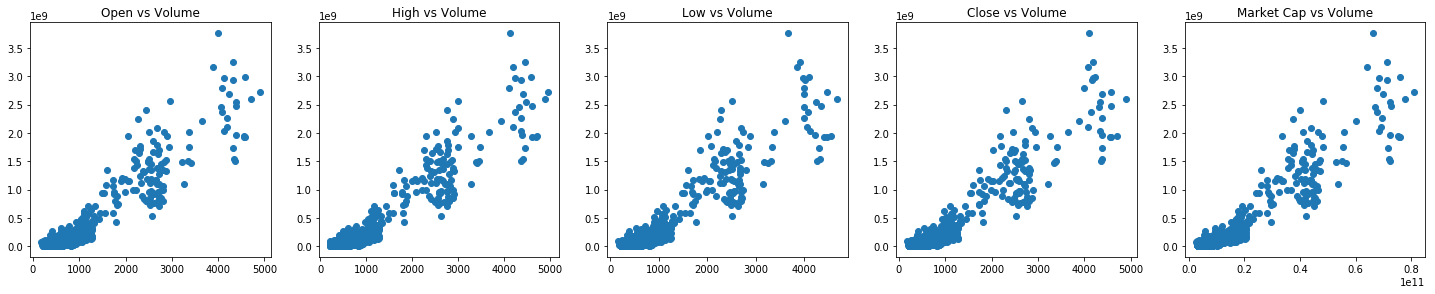

In [62]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, V)
plt.title('Open vs Volume')

plt.subplot(5,5,2)
plt.scatter(H, V)
plt.title('High vs Volume')

plt.subplot(5,5,3)
plt.scatter(L, V)
plt.title('Low vs Volume')

plt.subplot(5,5,4)
plt.scatter(C, V)
plt.title('Close vs Volume')

plt.subplot(5,5,5)
plt.scatter(MC, V)
plt.title('Market Cap vs Volume')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the figure above we can see that Volume almost has same condition with other column

In [68]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:1000]
Volume = df['Volume'].iloc[0:1000]

In [69]:
#Train model 
model.fit(Open, Volume)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Volume)

0.8657300900116398

In [71]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Volume_Predict = model.predict(open)
df['Volume Predict'] = Volume_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Volume Predict
1587,2013-05-02,116.38,125.60,92.28,105.21,NaN,1292190000,-1.259157e+08
1588,2013-05-01,139.00,139.89,107.72,116.99,NaN,1542820000,-1.130523e+08
1589,2013-04-30,144.00,146.93,134.05,139.00,NaN,1597780000,-1.102089e+08
1590,2013-04-29,134.44,147.49,134.00,144.54,NaN,1491160000,-1.156454e+08
1591,2013-04-28,135.30,135.98,132.10,134.21,NaN,1500520000,-1.151564e+08


In [72]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Volume Predict
0,2017-09-05,4228.29,4427.84,3998.11,4376.53,2.697970e+09,69954400000,2.212421e+09
1,2017-09-04,4591.63,4591.63,4108.40,4236.31,2.987330e+09,75955500000,2.419043e+09
2,2017-09-03,4585.27,4714.08,4417.59,4582.96,1.933190e+09,75841700000,2.415426e+09
3,2017-09-02,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000,2.595213e+09
4,2017-09-01,4701.76,4892.01,4678.53,4892.01,2.599080e+09,77748400000,2.481671e+09


Here I make a new column Volume Predict which contains Volume with no NaN value

In [74]:
df.count()

Date              1592
Open              1592
High              1592
Low               1592
Close             1592
Volume            1349
Market Cap        1592
Volume Predict    1592
dtype: int64